<a href="https://colab.research.google.com/github/BartoszJanJerzy/data-science-bootcamp/blob/master/Experimentally%20induced%20boredom%20-%20logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image

sns.set()
np.random.seed(10)

#Na podstawie nasilenia emocji przewidzieć, czy osoba się nudzi

## Dane surowe

In [60]:
raw_data = pd.read_csv('/content/Dane.csv')
raw_data.head()

,nr,plec,wiek,M_fot_1,M_rt_1,piek_1,M_p_rt_1,M_fot_2,M_rt_2,piek_2,M_p_rt_2,nuda_jak,nuda_il,PR_WO,Wyt_Det,Otw_Hum,Komp_Tol,Tol_Wyzw,Opt_Mob,rt1,rt2,rt3,rt4,rt5,rt_6,p_rt_1,p_rt_2,p_rt_3,p_rt_4,p_rt_5,p_rt_6,rt7,rt8,rt9,rt10,rt11,rt12,p_rt_7,p_rt_8,p_rt_9,...,zaskocz_1,neg_af_2,strach_2,smutek_2,wina_2,wrog_2,niesm_2,zmecz_2,poz_af_2,radosc_2,pewn_sb_2,uwazn_2,spokoj_2,zaskocz_2,rt_neg,rt_strach,rt_smut,rt_wina,rt_wrog,rt_niesm,rt_zmecz,rt_poz,rt_rad,rt_pewn,rt_uw,rt_spok,rt_zask,neg_af,strach,smutek,wina,wrog,niesm,zmecz,poz_af,radosc,pewn_sb,uwazn,spokoj,zaskocz
0,1,0,21,4.333333,6.690824,0.833333,2.670010,3.833333,4.851558,0.500000,2.957115,1,56,69,12,16,14,15,12,6.843366,6.774051,5.854006,4.202240,11.088847,5.382434,3.409724,1.566521,2.944506,1.818699,2.637157,3.643453,6.878299,3.477545,4.006206,4.188837,6.957160,3.601301,3.391595,3.645657,0.963279,...,6,19,8,16,17,11,4,13,26,20,17,15,11,4,1.820583,1.709402,1.981099,1.583110,2.004345,1.232639,2.200262,1.868854,1.895965,1.757156,1.682501,1.531974,2.016069,4,0,2,-1,3,-2,5,-5,-3,-3,0,0,-2
1,2,0,22,5.333333,4.101408,0.833333,3.437711,4.666667,4.422426,0.666667,2.929534,1,76,71,15,18,12,13,13,6.494722,3.713602,2.971776,3.129173,5.353667,2.945511,3.588640,3.571101,3.171964,1.291221,5.504215,3.499126,5.689150,3.338221,3.266094,3.834831,6.833323,3.572935,3.130525,3.654367,0.981705,...,6,14,8,8,7,6,7,11,30,22,21,16,11,6,1.269524,1.496081,1.650274,1.407007,1.323642,1.922727,1.453893,1.809881,2.356215,1.687866,1.743071,2.386268,2.313132,1,1,0,1,0,2,-1,2,0,4,1,0,0
2,3,0,22,6.166667,5.748738,0.666667,4.855421,6.000000,5.484797,1.000000,3.186319,1,100,58,12,15,11,11,9,6.654982,3.621899,2.866908,7.093405,5.348300,8.906936,3.411171,3.554672,2.907878,0.829581,11.277251,7.151975,6.542446,6.174742,6.334032,4.290494,4.101693,5.465377,3.241236,3.495782,1.838595,...,6,13,9,25,16,12,5,12,31,11,20,17,8,15,2.204739,2.385546,2.014631,2.130921,2.882301,2.313276,2.030253,2.261895,2.799713,2.886488,2.526246,2.852765,2.479717,-1,-3,2,-2,1,-1,1,2,-5,3,1,-1,9
3,5,0,23,2.833333,3.881720,0.333333,3.601441,2.333333,3.793902,0.000000,3.735946,1,100,83,18,18,15,17,15,3.370701,5.387383,2.928206,2.864354,5.366482,3.373197,3.463211,3.552241,3.078786,1.862676,6.036621,3.615110,4.402694,3.459649,1.865895,6.598516,3.548205,2.888457,3.130822,3.687876,1.261063,...,9,22,9,10,11,25,5,17,36,26,21,14,8,12,1.633840,1.523673,1.368837,1.937580,2.123640,1.342989,1.442085,1.401582,2.220207,1.603340,1.353279,2.012111,1.918888,8,3,2,4,17,-2,4,1,-3,0,-2,-2,3
4,6,0,23,4.166667,11.238256,0.666667,3.845508,5.166667,7.911699,0.666667,4.389729,1,84,76,14,19,12,16,15,6.943733,7.002155,10.996005,4.915954,20.422287,17.149401,3.726657,3.980002,3.103905,0.961589,7.259051,4.041843,6.358012,3.812209,7.283081,12.982110,7.540267,9.494517,3.461900,4.052938,2.893126,...,3,15,8,10,6,9,5,14,27,21,20,12,9,4,2.045140,2.458417,2.480509,2.402290,2.472205,2.590943,1.938022,2.568736,2.667546,2.887715,2.824324,3.414757,3.032894,1,0,-1,-1,3,1,6,0,2,1,1,0,1


In [61]:
em_pre = raw_data[['neg_af_1','smutek_1','wrog_1','zmecz_1','poz_af_1','uwazn_1']]
em_pre.rename(columns={
    'neg_af_1':'neg_aff',
    'smutek_1':'sadness',
    'wrog_1':'hostility',
    'zmecz_1':'tiredness',
    'poz_af_1':'pos_aff',
    'uwazn_1':'mindfulness',
}, inplace=True)
em_pre['boredom'] = 0
em_pre.head()

,neg_aff,sadness,hostility,tiredness,pos_aff,mindfulness,boredom
0,15,14,8,8,31,15,0
1,13,8,6,12,28,15,0
2,14,23,11,11,29,16,0
3,14,8,8,13,35,16,0
4,14,11,6,8,27,11,0


In [62]:
em_post = raw_data[['neg_af_2','smutek_2','wrog_2','zmecz_2','poz_af_2','uwazn_2']]
em_post.rename(columns={
    'neg_af_2':'neg_aff',
    'smutek_2':'sadness',
    'wrog_2':'hostility',
    'zmecz_2':'tiredness',
    'poz_af_2':'pos_aff',
    'uwazn_2':'mindfulness',
}, inplace=True)
em_post['boredom'] = 1
em_post.head()

,neg_aff,sadness,hostility,tiredness,pos_aff,mindfulness,boredom
0,19,16,11,13,26,15,1
1,14,8,6,11,30,16,1
2,13,25,12,12,31,17,1
3,22,10,25,17,36,14,1
4,15,10,9,14,27,12,1


In [63]:
emotions = em_pre.append(em_post)
emotions.describe()

,neg_aff,sadness,hostility,tiredness,pos_aff,mindfulness,boredom
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,17.125000,10.041667,9.841667,12.075000,29.908333,13.916667,0.500000
std,6.341225,4.609810,4.616368,4.189147,6.345773,3.000233,0.502096
min,10.000000,5.000000,6.000000,4.000000,12.000000,4.000000,0.000000
25%,13.000000,7.000000,7.000000,9.000000,26.000000,12.000000,0.000000
50%,15.000000,9.000000,8.000000,12.000000,30.000000,14.000000,0.500000
75%,20.000000,11.250000,11.000000,15.000000,34.000000,16.000000,1.000000
max,37.000000,25.000000,27.000000,20.000000,45.000000,20.000000,1.000000


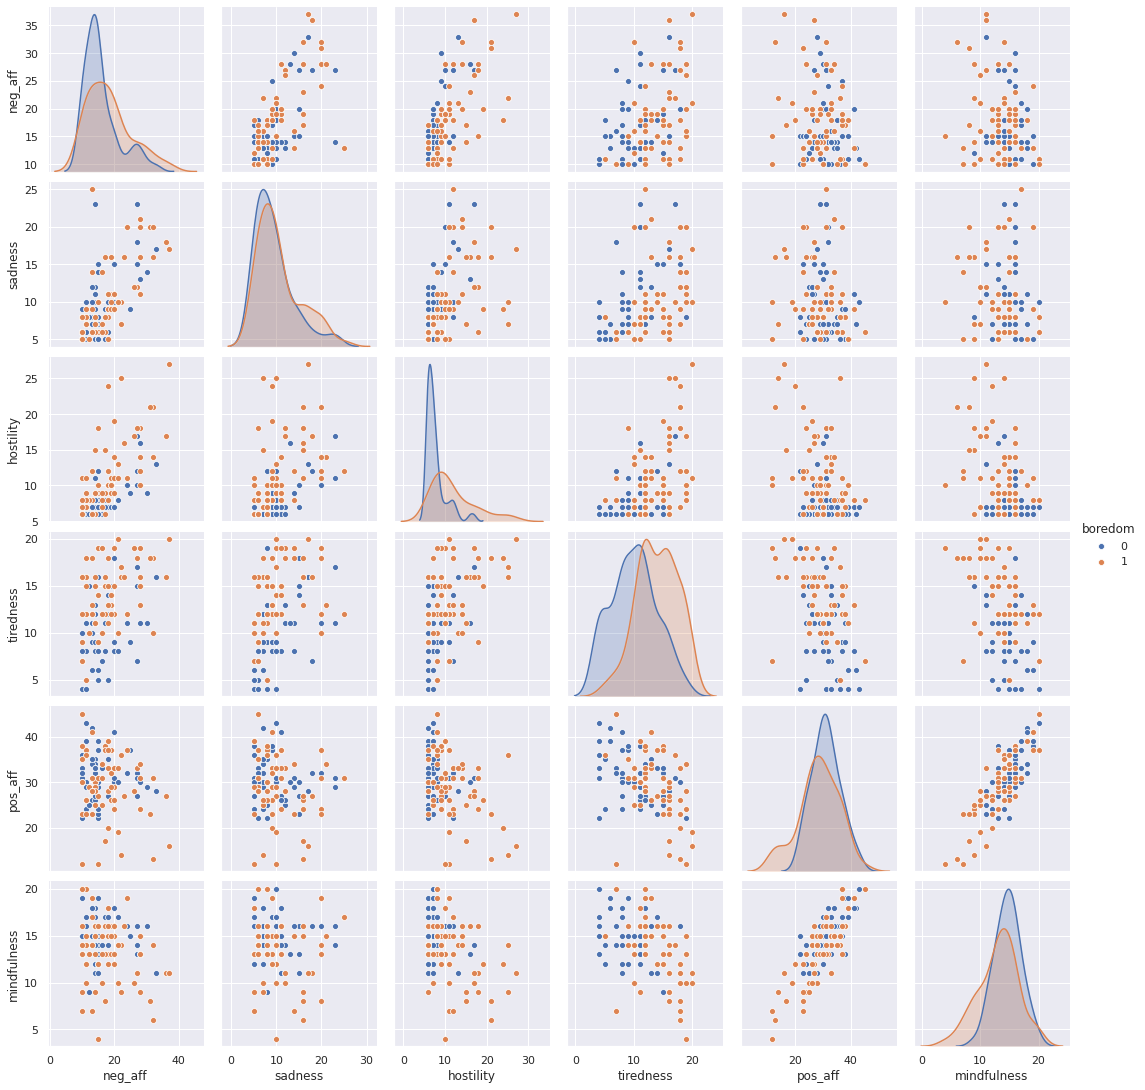

In [64]:
# Wykres rozrzutu
sns.pairplot(emotions, hue='boredom')

##Dane do modelu

In [65]:
X = emotions.values # predyktory
y = emotions['boredom'].values # zm. zależna

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y) #domyślny test_size to 0.25

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (90, 7)
X_test shape: (30, 7)
y_train shape: (90,)
y_test shape: (30,)


##Trenowanie modelu

In [67]:
# TRENOWANIE MODELU
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##Predykcja

In [68]:
# PREDYKCJA MODELU
y_prob = classifier.predict_proba(X_test)

'''
Jak czytać otrzymany array?
  Kolumna 1 - prawdopodobieństwo klasy 1
  Kolumna 2 - prawdopodobieństwo klasy 2
'''

y_prob

array([[7.50715324e-01, 2.49284676e-01],
       [4.63100788e-02, 9.53689921e-01],
       [7.56848161e-01, 2.43151839e-01],
       [1.33893789e-01, 8.66106211e-01],
       [4.18469206e-02, 9.58153079e-01],
       [9.37272459e-01, 6.27275410e-02],
       [1.48214989e-01, 8.51785011e-01],
       [1.64903475e-01, 8.35096525e-01],
       [8.52393065e-01, 1.47606935e-01],
       [7.13064635e-01, 2.86935365e-01],
       [9.03395622e-01, 9.66043781e-02],
       [9.72178724e-01, 2.78212763e-02],
       [6.47466257e-02, 9.35253374e-01],
       [8.70516758e-01, 1.29483242e-01],
       [1.11876960e-01, 8.88123040e-01],
       [9.48376016e-01, 5.16239840e-02],
       [9.12086327e-01, 8.79136735e-02],
       [9.21075512e-01, 7.89244880e-02],
       [9.10516774e-01, 8.94832259e-02],
       [9.23260077e-01, 7.67399227e-02],
       [5.23481551e-02, 9.47651845e-01],
       [3.13687895e-03, 9.96863121e-01],
       [9.35008814e-01, 6.49911859e-02],
       [8.87754277e-01, 1.12245723e-01],
       [9.370525

In [74]:
y_pred = classifier.predict(X_test)
print(y_pred)
print(y_test)

[0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1]
[0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1]


In [70]:
# WIZUALIACJA

from sklearn.metrics import confusion_matrix, accuracy_score
import plotly.figure_factory as ff

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)

def plot_confusion_matrix(cm):
    # Binary classification
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['predicted no-boredom', 'predicted boredom'], index=['true boredom', 'true no-boredom'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title=f'Confusion Matrix, Accuracy: {acc:.4f}', font_size=16)
    fig.show()

print(f'ACCURACY SCORE = {acc}')
plot_confusion_matrix(cm)

ACCURACY SCORE = 0.9666666666666667


In [73]:
# RAPORT KLASYFIKACJI

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

